In [1]:
import cv2
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os
import h5py
from skimage.feature import greycomatrix
from skimage.feature import greycoprops
train_path="dataset/"
train_labels = os.listdir(train_path)

/home/praneet/envs/deeplearning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_labels

['Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Early_blight']

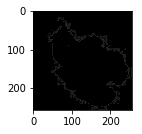

In [19]:
import cv2

# empty lists to hold feature vectors and labels
global_features = []
labels = []
bins = 8
i, j = 0, 0
k = 0

test_image = 'dataset/4.jpg'
test = cv2.imread(test_image)
cv2.imshow('original', test)

image = test

img_out = cv2.cvtColor(test, cv2.COLOR_BGR2YUV)
cv2.imshow('YUV', img_out)

img_out[:, :, 0] = cv2.equalizeHist(img_out[:, :, 0])
cv2.imshow('equalized', img_out)

img_equi = cv2.cvtColor(img_out, cv2.COLOR_YUV2BGR)
cv2.imshow('bgr', img_equi)

image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2GRAY)
hu_feature = cv2.HuMoments(cv2.moments(image))
hu_feature = hu_feature.reshape(1, -1)

image_hsv = cv2.cvtColor(img_equi, cv2.COLOR_BGR2HSV)
cv2.imshow('hsv', image_hsv)

hist = cv2.calcHist([image_hsv], [0, 1, 2], None, [bins, bins, bins],
                            [0, 256, 0, 256, 0, 256])
# normalize the histogram
cv2.normalize(hist, hist)
hist_feature = hist.reshape(1, -1)
#         print(hist_feature.shape())
cluster4
####RGB TO LAB COLOR SPACE CONVERSION###
lab_image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2LAB)
cv2.imshow('lab', lab_image)

######k means of LAB COLOR CHANNEL#####
vectorized = lab_image.reshape(-1, 3)
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10,
            1.0)
ke = 4
res1, label, center = cv2.kmeans(vectorized, ke, None, criteria, 10,
                                 cv2.KMEANS_RANDOM_CENTERS)

# cv2.imshow('center', label)

center = np.uint8(center)
c = (label.flatten())
res2 = center[c.astype(int)]
res3 = res2.reshape((lab_image.shape))
plt.subplot(222), plt.imshow(res3)

cv2.imshow('res3', res3)

###### Feature extraction-------TEXTUAL FEATURES#######
#         img_out_feature = cv2.cvtColor(res3, cv2.COLOR_LAB2RGB)

####Finding Infected Cluster#################
cluster1 = np.zeros(lab_image.shape, np.uint8)
cluster2 = np.zeros(lab_image.shape, np.uint8)
cluster3 = np.zeros(lab_image.shape, np.uint8)
cluster4 = np.zeros(lab_image.shape, np.uint8)

for x in range(255):
    for y in range(255):
        if np.all((res3[x, y]) == center[0]):
            cluster1[x, y] = image[x, y]
        elif np.all((res3[x, y]) == center[1]):
            cluster2[x, y] = image[x, y]
        elif np.all((res3[x, y]) == center[2]):
            cluster3[x, y] = image[x, y]
        elif np.all((res3[x, y]) == center[3]):
            cluster4[x, y] = image[x, y]
            
            
cv2.imshow('cluster1', cluster1)
cv2.imshow('cluster2', cluster2)
cv2.imshow('cluster3', cluster3)
cv2.imshow('cluster4', cluster4)
#         plt.subplot(341),plt.imshow(cluster1)
#         plt.subplot(342),plt.imshow(cluster2)
#         plt.subplot(343),plt.imshow(cluster3)
#         plt.subplot(344),plt.imshow(cluster4)
r1, g1, b1 = cv2.split(cluster1)
r2, g2, b2 = cv2.split(cluster2)
r3, g3, b3 = cv2.split(cluster3)
r4, g4, b4 = cv2.split(cluster4)
#         print(np.max(r1))
if (np.max(r1) < 92 or np.max(g1) < 96 or np.max(b1) < 80):

    infected_cluster = cluster1
    plt.imshow(infected_cluster)
#                     print('cluster1 data')
#                     print(np.max(r1))
#                     print(np.max(g1))
#                     print(np.max(b1))
#                     print('hello')

#

elif (np.max(r2) < 92 or np.max(g2) < 96 or np.max(b2) < 80):
    infected_cluster = cluster2
    plt.imshow(infected_cluster)
#                     print('cluster2 data')
#                     print(np.max(r2))
#                     print(np.max(g2))
#                     print(np.max(b2))
#                     print('hi')

#                 r,g,b = cv2.split(cluster3)

elif (np.max(r3) < 92 or np.max(g3) < 96 or np.max(b3) < 80):

    infected_cluster = cluster3
    plt.imshow(infected_cluster)
#                     print('hello hi')
#                     print('cluster3 data')
#                     print(np.max(r3))
#                     print(np.max(g3))
#                     print(np.max(b3))

#                     r,g,b = cv2.split(cluster4)

elif (np.max(r4) < 92 or np.max(g4) < 96 or np.max(b4) < 80):
    #                     print('cluster4 data')
    #                     print(np.max(r4))
    #                     print(np.max(g4))
    #                     print(np.max(b4))
    infected_cluster = cluster4
    plt.imshow(infected_cluster)
    print('welcome')

else:
    flag = 0
    #                 print(flag)
    infected_cluster = img_equi
    plt.imshow(infected_cluster)
#                 print('Its Healthy',flag)

cv2.imshow('infected_cluster', infected_cluster)

######Converting to GrayScale Image##########

img_out = cv2.cvtColor(infected_cluster, cv2.COLOR_RGB2GRAY)
# plt.subplot(345),plt.imshow(img_out, cmap='gray')

##########Textual_features_extrcation##########
g = greycomatrix(
    img_out, [2], [0], levels=256, normed=True, symmetric=True)
contrast_g = greycoprops(g, 'contrast')
correlation_g = greycoprops(g, 'correlation')
energy_g = greycoprops(g, 'energy')
# entropy_g=greycoprops(g,'entropy')
homogeneity_g = greycoprops(g, 'homogeneity')
dissimilarity_g = greycoprops(g, 'dissimilarity')
global_feature = np.hstack([
    contrast_g, correlation_g, energy_g, homogeneity_g,
    dissimilarity_g, hu_feature, hist_feature
])
# labels.append(current_label)
global_features.append(global_feature)

i += 1
k += 1



cv2.waitKey(0)
cv2.destroyAllWindows()

current_label Tomato___healthy
welcome


/home/praneet/envs/deeplearning/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


welcome


KeyboardInterrupt: 

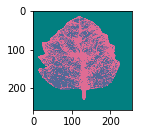

In [14]:
# empty lists to hold feature vectors and labels
global_features = []
labels = []
bins = 8
i, j = 0, 0
k = 0
for training_name in train_labels:
    # join the training data path and each species training folder
    img_list = os.listdir(train_path + '/' + training_name)
    
    current_label = training_name
    print('current_label', current_label)
    k = 1

    for img in img_list:
        image = train_path + '/' + training_name + '/' + img
        ip_img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
        
        image = ip_img
        
        ###HISTOGRAM EQUALIZATION####
        img_out = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        img_out[:, :, 0] = cv2.equalizeHist(img_out[:, :, 0])
        img_equi = cv2.cvtColor(img_out, cv2.COLOR_YUV2BGR)

        image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2GRAY)
        hu_feature = cv2.HuMoments(cv2.moments(image))
        hu_feature = hu_feature.reshape(1, -1)

        image_hsv = cv2.cvtColor(img_equi, cv2.COLOR_BGR2HSV)
        # compute the color histogram
        hist = cv2.calcHist([image_hsv], [0, 1, 2], None, [bins, bins, bins],
                            [0, 256, 0, 256, 0, 256])
        # normalize the histogram
        cv2.normalize(hist, hist)
        hist_feature = hist.reshape(1, -1)
        #         print(hist_feature.shape())
        ####RGB TO LAB COLOR SPACE CONVERSION###
        lab_image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2LAB)
        ######k means of LAB COLOR CHANNEL#####
        vectorized = lab_image.reshape(-1, 3)
        vectorized = np.float32(vectorized)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10,
                    1.0)
        ke = 4
        res1, label, center = cv2.kmeans(vectorized, ke, None, criteria, 10,
                                         cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        c = (label.flatten())
        res2 = center[c.astype(int)]
        res3 = res2.reshape((lab_image.shape))
        plt.subplot(222), plt.imshow(res3)

        ###### Feature extraction-------TEXTUAL FEATURES#######
        #         img_out_feature = cv2.cvtColor(res3, cv2.COLOR_LAB2RGB)

        ####Finding Infected Cluster#################
        cluster1 = np.zeros(lab_image.shape, np.uint8)
        cluster2 = np.zeros(lab_image.shape, np.uint8)
        cluster3 = np.zeros(lab_image.shape, np.uint8)
        cluster4 = np.zeros(lab_image.shape, np.uint8)

        for x in range(255):
            for y in range(255):
                if np.all((res3[x, y]) == center[0]):
                    cluster1[x, y] = image[x, y]
                elif np.all((res3[x, y]) == center[1]):
                    cluster2[x, y] = image[x, y]
                elif np.all((res3[x, y]) == center[2]):
                    cluster3[x, y] = image[x, y]
                elif np.all((res3[x, y]) == center[3]):
                    cluster4[x, y] = image[x, y]
#         plt.subplot(341),plt.imshow(cluster1)
#         plt.subplot(342),plt.imshow(cluster2)
#         plt.subplot(343),plt.imshow(cluster3)
#         plt.subplot(344),plt.imshow(cluster4)
        r1, g1, b1 = cv2.split(cluster1)
        r2, g2, b2 = cv2.split(cluster2)
        r3, g3, b3 = cv2.split(cluster3)
        r4, g4, b4 = cv2.split(cluster4)
        #         print(np.max(r1))
        if (np.max(r1) < 92 or np.max(g1) < 96 or np.max(b1) < 80):

            infected_cluster = cluster1
            plt.imshow(infected_cluster)
#                     print('cluster1 data')
#                     print(np.max(r1))
#                     print(np.max(g1))
#                     print(np.max(b1))
#                     print('hello')

#

        elif (np.max(r2) < 92 or np.max(g2) < 96 or np.max(b2) < 80):
            infected_cluster = cluster2
            plt.imshow(infected_cluster)
#                     print('cluster2 data')
#                     print(np.max(r2))
#                     print(np.max(g2))
#                     print(np.max(b2))
#                     print('hi')

#                 r,g,b = cv2.split(cluster3)

        elif (np.max(r3) < 92 or np.max(g3) < 96 or np.max(b3) < 80):

            infected_cluster = cluster3
            plt.imshow(infected_cluster)
#                     print('hello hi')
#                     print('cluster3 data')
#                     print(np.max(r3))
#                     print(np.max(g3))
#                     print(np.max(b3))

#                     r,g,b = cv2.split(cluster4)

        elif (np.max(r4) < 92 or np.max(g4) < 96 or np.max(b4) < 80):
            #                     print('cluster4 data')
            #                     print(np.max(r4))
            #                     print(np.max(g4))
            #                     print(np.max(b4))
            infected_cluster = cluster4
            plt.imshow(infected_cluster)
            print('welcome')

        else:
            flag = 0
            #                 print(flag)
            infected_cluster = img_equi
            plt.imshow(infected_cluster)
#                 print('Its Healthy',flag)

######Converting to GrayScale Image##########

        img_out = cv2.cvtColor(infected_cluster, cv2.COLOR_RGB2GRAY)
        # plt.subplot(345),plt.imshow(img_out, cmap='gray')

        ##########Textual_features_extrcation##########
        g = greycomatrix(
            img_out, [2], [0], levels=256, normed=True, symmetric=True)
        contrast_g = greycoprops(g, 'contrast')
        correlation_g = greycoprops(g, 'correlation')
        energy_g = greycoprops(g, 'energy')
        # entropy_g=greycoprops(g,'entropy')
        homogeneity_g = greycoprops(g, 'homogeneity')
        dissimilarity_g = greycoprops(g, 'dissimilarity')
        global_feature = np.hstack([
            contrast_g, correlation_g, energy_g, homogeneity_g,
            dissimilarity_g, hu_feature, hist_feature
        ])
        labels.append(current_label)
        global_features.append(global_feature)

        i += 1
        k += 1
#         print('k is',k)
#         print('i is',i)
    print("[STATUS] processed folder: {}".format(current_label))
    print('GLOBAL FEATURE SHAPE', np.array(global_features).shape)

    j += 1
    print('j is', j)
# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))